<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Flask

_Instructor: Tim Williams

---

<a id="learning-objectives"></a>
### Learning Objectives

- Understand what Flask is and what a web backend does.
- Understand how values are passed between a website and the Flask backend.
- Create a simple website locally that allows the user to interact with a model.
- Practice adding new features to our website.

<a id="introduction"></a>
## Introduction
---

![flask logo](http://flask.pocoo.org/static/logo/flask.png)
Flask is a fast, lightweight way to connect your Python scripts to a server. It's a **simple and robust framework** that can do small tasks (create a microblog, stand up a simple API) or complex ones (Pinterest's API, create a twitter clone).

Flask is called a _microframework_ because it is **minimalistic and does not impose an application structure** on you. Flask allows you to "plug in" libraries of your choice to add additional functionality. "Heavier" frameworks **such as Django typically come with their own libraries** (e.g. for database access). This is often convenient, but it takes **more time to learn and is not as flexible**.

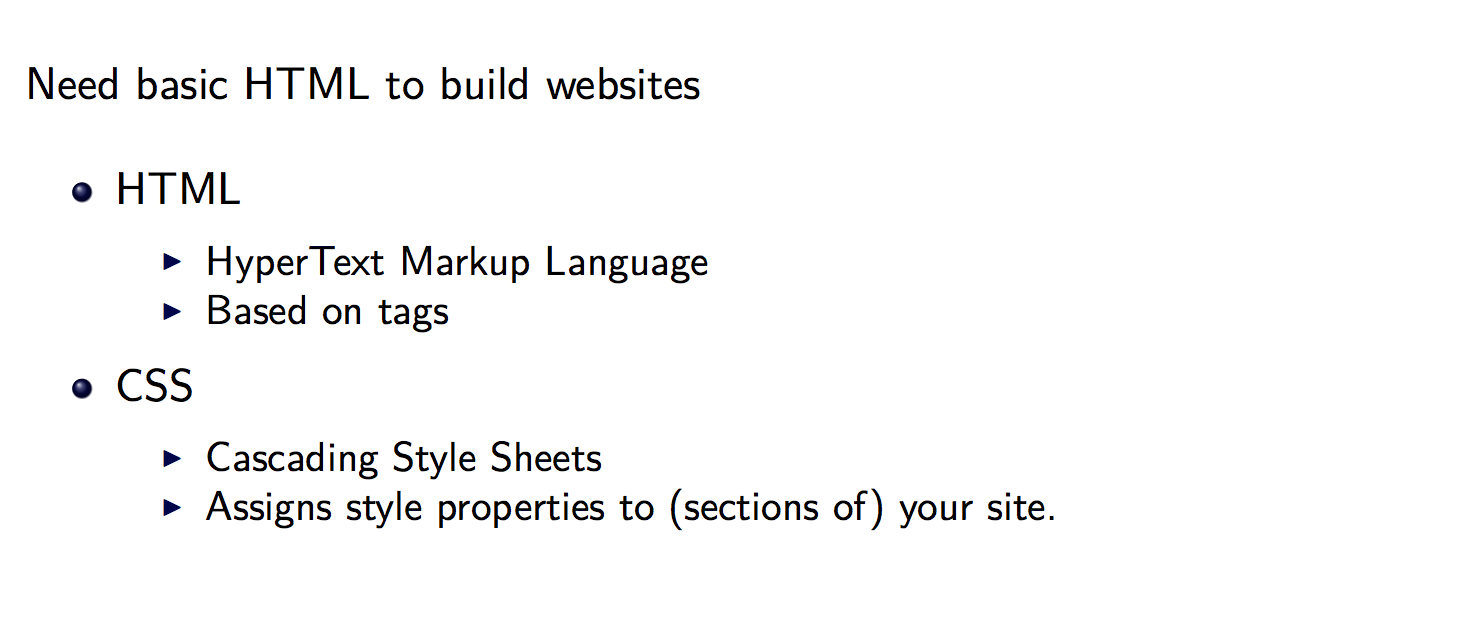

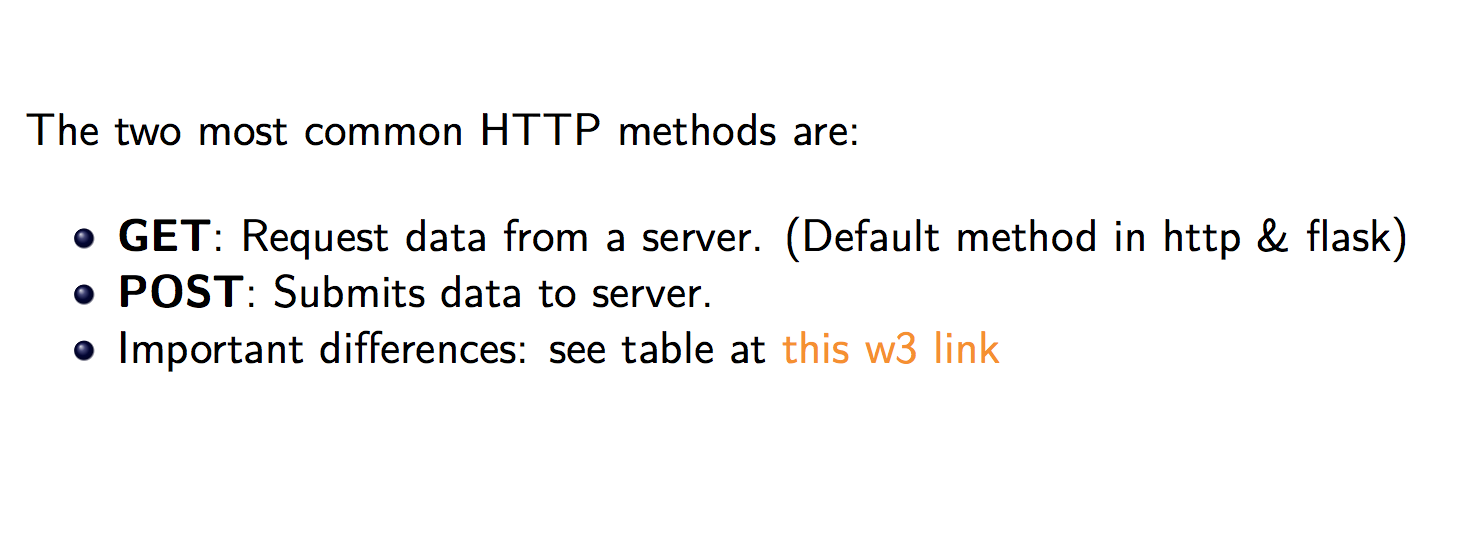

https://www.w3schools.com/tags/ref_httpmethods.asp

Let's jump in with a simple example. Then, we'll expand it to show what it can do with your models. Flask comes preinstalled with Anaconda. However, if you don't have it you can install it:

```bash
$ conda install flask
```

### Let's discuss how Flask is used to render a website:

1. First, each URL is mapped to a function (called **routing**).

2. When the user visits the URL, the **associated function is called**.

3. The function returns an HTML, which is directly **rendered by the browser**.

That's it! 

> Using this way of thinking, **when visiting a URL** you are actually **making a function call to a remote computer**.

> The **URL is the function signature** (including parameters), and the **function returns a value back to the browser** -- in this case a string of HTML. In fact, this is why interfaces for retrieving data online are called "Web APIs" -- they are just **function calls disguised as URLs**!

<a id="part----hello-world"></a>
### Part 1 - Hello, world

Let's create a new file called `hello.py`:

First we want to organise our project a little bit so we are going to create a new folder: ./app and change directory into it:

In [1]:
# create a folder "app"
import os
folder_ = "./app"
if not os.path.exists(folder_):
    os.makedirs(folder_)

Let's write our file script:

In [2]:
%%writefile ./app/hello.py
import flask
app = flask.Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!"

if __name__ == '__main__':
    app.run(debug=True)

Writing ./app/hello.py


Let's verify the folder:

In [3]:
!open ./app

### Let's describe line by line what's happening in this script:

- import the flask microframework
- instanciate the flask app
- l5 to l7 define a function and use a `decorator` to be able to call it through a web request
- l9 this line avoid to run the file if you import it in another script
- l10 run the app ( when the if in l9 is True)

Note that `app` must be defined prior to using the decorators! 

### What's a decorator?

- By definition,in python a decorator is a function that takes another function and extends the behavior of the latter function without explicitly modifying it.  
Sounds confusing—but it’s really not. Think about decorator as `wrappers` that will extend what the function it takes as an argument will do.

**Question:** What other kind of wrappers have we seen so far? 

### Example:

In [4]:
def my_decorator(some_function):

    def wrapper():

        print("Something is happening before some_function() is called.")

        some_function()

        print("Something is happening after some_function() is called.")

    return wrapper

In [5]:
def just_some_function():
    print("Wheee!")
    
just_some_function_decorated = my_decorator(just_some_function)


In [6]:
just_some_function()

Wheee!


In [7]:
just_some_function_decorated()

Something is happening before some_function() is called.
Wheee!
Something is happening after some_function() is called.


### This can also be done using `@` special character (assuming you defined correctly the decorator function):

In [8]:
%%writefile decorator_example.py

def my_decorator(some_function):

    def wrapper():

        print("Something is happening before some_function() is called.")

        some_function()

        print("Something is happening after some_function() is called.")

    return wrapper


if __name__ == "__main__":
    my_decorator()

Writing decorator_example.py


In [9]:
from decorator_example import my_decorator

@my_decorator
def just_some_function():
    print("Wheee!")

just_some_function()

Something is happening before some_function() is called.
Wheee!
Something is happening after some_function() is called.


**Exercise (8min):** Write a decorator that will calculate the execution time of the function you *decorate*:

Let's write a function to check if a number is prime - this is a common technical interview challenge

*Note*: One way to achieve that is to use the function time and calculate the difference between the start and end of the function:
```
from time import time

start_time = int(round(time() * 1000))
your function()
time_diff = current_milli_time() — start_time 
print(time_diff)
```

In [3]:
# CREATE YOUR TIMER FUNCTION HERE

In [4]:
# CREATE THE FUNCTION TO CHECK IF A NUMBER IS PRIME DECORATED BY THE TIMER FUNCTION


In [2]:
# RUN THE FUCNTION HERE


### Back to Flask. Let's now run our application:

Run it from the terminal:

```
export FLASK_APP=hello.py
export FLASK_ENV=development
flask run
```
or do:
```
export FLASK_APP=hello.py
export FLASK_ENV=development
python hello.py
```

Three things happen here:
- initialize the app
- use built-in decorators to define what happens on a page
- launch the app


 You should have:
 ```
 * Serving Flask app "hello" (lazy loading)
 * Environment: development
 * Debug mode: on
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 154-646-553
 ```
 
 Go to that URL to see your app running on your localhost.

Typically, we develop apps locally using this development server. When working, we then upload the files to a web host such as EC2.

<a id="part----arguments-and-styling"></a>
### Part 2 - Arguments and styling

Add the following route underneath the hello() function:

```Python
@app.route('/greet/<name>')
def greet(name):
    '''Say hello to your first parameter'''
    return "Hello, %s!" %name
```
Save and relaunch the app. Now navigate to `http://127.0.0.1:5000/greet/Roger`. Your function should respond to that input!

Since the `return` statement sends text to an HTML page, you can style our original `hello()` function with HTML tags:

```Python
@app.route("/")
def hello():
    return '''
    <body>
    <h2> Hello World! <h2>
    </body>
    '''
```
We can also call a function, but let's get into that a little later.

Before looking in a bit more details how flask works, let's see **some simple examples (cf. example_folder)**

<a id="part----add-in-machine-learning"></a>
### Part 3 - Add in machine learning
We can use Flask as a way to share and host our machine learning predictions.

In the app folder, create a new file `titanic_app.py`. Import and initialize the flask app, and launch the server at the bottom. Leave room in the middle to add in your model and routes later on.

```Python
import flask
from flask import render_template
app = flask.Flask(__name__)

#-------- MODEL GOES HERE -----------#

#-------- ROUTES GO HERE -----------#

if __name__ == '__main__':
    '''Connects to the server'''

    HOST = '127.0.0.1'
    PORT = 5000

    app.run(HOST, PORT)
```
Note that this time we specifed the host and port we want the app to run on.

<a id="part----create-and-train-a-model"></a>
### Part 4 - Create and train a Model

In [15]:
!mkdir app/data

Load in the titanic dataset and create a model on it:

```Python
#-------- MODEL GOES HERE -----------#
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('../datasets/titanic.csv')
include = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Survived']

# Create dummies and drop NaNs
df['Sex'] = df['Sex'].apply(lambda x: 0 if x == 'male' else 1)
df = df[include].dropna()

X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp']]
y = df['Survived']

model = RandomForestClassifier(n_estimators=100).fit(X, y)

pickle.dump(model, open('./data/model.pkl', 'wb'))
```

In [25]:
import numpy as np
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('datasets/titanic.csv')
include = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Survived']

# Create dummies and drop NaNs
df['Sex'] = df['Sex'].apply(lambda x: 0 if x == 'male' else 1)
df = df[include].dropna()

X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp']]
y = df['Survived']

model = RandomForestClassifier(n_estimators=100).fit(X, y)

pickle.dump(model, open('model.pkl', 'wb'))

You could also train and test your model in a Jupyter notebook and pickle the fitted model. This would result in a much faster load time for your app. In that case, your code would look something like this:

```Python
with open('../model.pkl', 'rb') as picklefile:
    model = pickle.load(picklefile)
```

<a id="part----make-a-simple-api"></a>
### Part 5 - Make a simple API


Here's the fun part. Now that we have a `PREDICTOR`, we need to get some values to make our predictions.

One way to do this is to get information from the **URL parameters**. These are the part of a URL that come after the `?` and are matched by key:value pairs. For example, if you navigate to:

```
http://localhost:5000/predict?pclass=1&sex=1&age=18&fare=500&sibsp=0
```

then Flask can retrieve that data for you. Let's write a route to do just that:

```Python
#-------- ROUTES GO HERE -----------#

@app.route('/predict', methods=["GET"])
def predict():
    pclass = flask.request.args['pclass']
    sex = flask.request.args['sex']
    age = flask.request.args['age']
    fare = flask.request.args['fare']
    sibsp = flask.request.args['sibsp']

    item = np.array([pclass, sex, age, fare, sibsp]).reshape(1, -1)
    score = model.predict_proba(item)
    results = {'survival chances': score[0,1], 'death chances': score[0,0]}
    return flask.jsonify(results)
```



And... voila! Save the file. Launch your app. You now have a simple API for your model.  


## IMPORTANT:
The code has been writen buy a monkey barely knowing sklearn. Debug it. Flask has a debugging argument...

**Bonus:** the monkey has saved the model under a pickle file. Try to load the model from it (ie not re-running it).

**Super Bonus:** you must have realised the model is far from being optimised. Feel free to pimp up its performance. Or use another one

Play with the parameters in the URL. You should get the predicted probability of death and survival.

### Templates to the rescue:  
If you could keep the **logic** of your application separate from the **layout or presentation** of your web pages things would be much **better organized**, don't you think?  
You could even hire a web designer to create a killer web site while you code the **site's behaviors** in Python.  **Templates help implement this separation.**

In [30]:
!mkdir app/templates

In [31]:
%%writefile ./app/templates/index.html
<html>
  <head>
    <title>Titanic Survivor-O-Matic</title>
  </head>
  <body>
      <h1>Hello, {{ name }}!</h1>
  </body>
</html>

Writing ./app/templates/index.html


As you see above, we just wrote a mostly standard HTML page, with the only difference that there are some placeholders for the dynamic content enclosed in {{ ... }} sections.

Remember the example before:

```python

from flask import render_template

@app.route('/')
@app.route('/index')
@app.route('/greet/<name>')
def index():
    return render_template('index.html',
                           title='Home',
                           name=name)
```

The two most common HTTP methods are `GET` and `POST`. When your browser visits a URL, it sends a `GET` request. However, when you submit a web form, typically a `POST` request is sent.  
For a `POST` request, a URL is still accessed. However, the parameters are sent **inside the request body instead of as part of the URL** (as we saw earlier with the `GET` parameters).   
Sending parameters in the body allows you to **send more data than would fit inside the URL**.  

However, it prevents a user from bookmarking the exact URL call and "hides" the submitted data from the user. (It only hides it from your average user -- the submitted data is actually easy to see using your browser's developer tools.)

Luckily, Flask knows how to read `form` tags in an HTML file that have been `POST`'d to the server.

First let's create a new html page:

In [32]:
%%writefile ./app/templates/page.html
<!doctype html>
<html>
  <head>
    <title>Titanic Survivor-O-Matic</title>
  </head>
  <body>

    <form action="http://localhost:5000/result" method="POST">
      <p>Class <input type="number" name="pclass" /></p>
      <p>Sex <input type="number" name="sex" /></p>
      <p>Age <input type="number" name="age" /></p>
      <p>Fare <input type="number" name="fare" /></p>
      <p># of siblings <input type="text" name="sibsp" /></p>

      <p><input type="submit" value="submit" /></p>
    </form>

  </body>
</html>

Writing ./app/templates/page.html


Add two new decorators in below your first one.

```Python
#---------- CREATING AN API ----------------#

# This method takes input via an HTML page

@app.route('/')
@app.route('/page')
def page():
   with open("templates/page.html", 'r') as viz_file:
       return viz_file.read()

@app.route('/result', methods=['POST', 'GET'])
def result():
    '''Gets prediction using the HTML form'''
    if flask.request.method == 'POST':

       inputs = flask.request.form

       pclass = inputs['pclass'][0]
       sex = inputs['sex'][0]
       age = inputs['age'][0]
       fare = inputs['fare'][0]
       sibsp = inputs['sibsp'][0]

       item = np.array([pclass, sex, age, fare, sibsp])
       item = item.reshape(1, len(item))
       score = model.predict_proba(item)
       results = {'survival chances': score[0,1], 'death chances': score[0,0]}
       return flask.jsonify(results)

```

Save, close, and relaunch the app. Go to `http://127.0.0.1:5000/page` and type in your inputs.

Both methods should still be there. You can either play with the URL parameters at `/predict` or enter them at `/page`

<a id="independent-practice"></a>
## Independent Practice
---

See if you can customize and play around with the app you just built. Try the following things:

- Create the model in jupyter / atom, pickle it, and import it into your flask app.  Play around with the features used, change the model
- Make the app look nicer by playing with the HTML.  Can you use dropdowns?  Buttons?
- See if you can return more values to the page, like the predicted category, or the model's parameters.
- Create a Postgres database and records your users inputs.
- Add the 10 latest entries to the page using pandas (turns out pandas as a method to print the dataframe straight in html.
- Dynamic web applications also need static files (That’s usually where the CSS and JavaScript files are coming from). Add a "static" folder to your app called "static" and try to import a favicon to your webpages.
- Whenever you let the user provide inputs, you must always validate them. For example, can you enter values that make the web app crash or return invalid output? To prevent this, you must always validate your inputs -- can you add some input validation here? Can you show the user an error if some inputs are not valid?


<a id="examples"></a>
## Examples
---

Here are some examples of Flask apps in action. Fork and clone the apps you like so you can play with them and edit them on your local machine.

Two apps using scikit-learn:
- https://angulardemo.colindcarroll.com/
Github: [Visualizing the Iris dataset using Flask and Angular JS](https://github.com/ColCarroll/flask_angular_example)
- 
Github: [Using Neural Nets to recognize images](https://github.com/mdlai/digit_recognition)

More websites built in Flask:
- [The Flask Website itself!](http://flask.pocoo.org/)
- [A reddit clone](https://github.com/codelucas/flask_reddit)


<a id="additional-resources"></a>
## Additional Resources
---

- [The Flask Documentation](http://flask.pocoo.org/docs/0.11/)
- [A Flask tutorial to follow along with](https://github.com/miguelgrinberg/flask-pycon2014)
- [The Flask mega tutorial](http://blog.miguelgrinberg.com/post/the-flask-mega-tutorial-part-ii-templates)
